In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

2024-06-13 20:16:28.260598: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 20:16:28.263241: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 20:16:28.295590: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 20:16:28.951984: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Load Model    

In [2]:
# Load the model
model = keras.models.load_model('../fitmotion_model.keras')
labels = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

2024-06-13 20:16:30.853911: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-13 20:16:30.869242: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/rayhannarindran/programming/python/miniconda3/envs/tf-testing/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Loading The Data

### Native Android Data

In [74]:
# Load Android Data
data_source = 'android_data_cleaned'
data_type = 'wlk'
data_num = '4'
data_url = '../data/' + data_source + '/' + data_type + '/' + data_type + '_' + data_num + '.csv'

df = pd.read_csv(data_url, sep=',')
df = df.drop(['Unnamed: 0'], axis=1) if 'Unnamed: 0' in df.columns else df
df = df.drop(['id'], axis=1) if 'id' in df.columns else df
df

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,-0.344128,-2.939821,-1.813954,-1.983571,-9.108812,3.043906,-0.086417,-0.344736,0.284018,-0.044231,-0.074709,-0.016775
1,-0.344128,-2.939821,-1.813954,-1.983571,-9.108812,3.043906,-0.749125,-0.151263,0.152461,-0.044231,-0.074709,-0.016775
2,-0.344128,-2.939821,-1.813954,-1.983571,-9.108812,3.043906,-0.749125,-0.151263,0.152461,-0.044231,-0.074709,-0.016775
3,-0.344128,-2.939821,-1.813954,-1.983571,-9.108812,3.043906,-0.749125,-0.151263,0.152461,-0.044231,-0.074709,-0.016775
4,-0.321210,-2.920565,-2.078385,-2.092468,-9.068789,3.090148,-0.749125,-0.151263,0.152461,-0.029428,-0.114925,-0.268176
...,...,...,...,...,...,...,...,...,...,...,...,...
1946,-0.195736,-2.979054,-2.465907,-1.428701,-9.442306,2.229812,1.316229,-0.601590,0.527157,0.132260,0.110927,0.113691
1947,-0.195736,-2.979054,-2.465907,-1.428701,-9.442306,2.229812,1.316229,-0.601590,0.527157,0.132260,0.110927,0.113691
1948,-0.195736,-2.979054,-2.465907,-1.428701,-9.442306,2.229812,1.316229,-0.601590,0.527157,0.132260,0.110927,0.113691
1949,-0.087583,-2.883929,-2.329424,-1.910193,-8.451045,4.593625,1.316229,-0.601590,0.527157,-0.081977,0.180186,0.365741


### Web iPhone Data

In [3]:
# Load Android Data
data_source = 'html_data'
device_source = 'iphone'
data_type = 'sit'
data_num = '1'
data_url = '../data/' + data_source + '/' + device_source + '/' + data_type + '/' + data_type + '_' + data_num + '.csv'

df = pd.read_csv(data_url, sep=',')
df = df.drop(['Unnamed: 0'], axis=1) if 'Unnamed: 0' in df.columns else df
df = df.drop(['id'], axis=1) if 'id' in df.columns else df
df = df.drop(['Timestamp'], axis=1) if 'Timestamp' in df.columns else df
df

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,-156.62,42.47,-156.56,-6.28,-2.72,-6.30,27.36,-3.73,10.39,0.00,0.32,0.60
1,-155.26,42.23,-155.24,-6.45,-2.97,-6.45,33.68,3.85,16.88,-0.16,0.10,0.42
2,-156.21,40.54,-154.74,-6.28,-2.97,-6.72,39.38,-0.37,21.32,0.01,0.15,0.12
3,-156.84,38.12,-153.38,-6.36,-3.19,-7.45,41.00,-22.94,22.07,-0.02,-0.04,-0.67
4,-151.37,37.82,-148.32,-6.70,-4.13,-7.57,40.71,-35.18,26.82,-0.29,-0.95,-0.87
...,...,...,...,...,...,...,...,...,...,...,...,...
2096,-143.71,8.53,-104.23,-1.45,-5.70,-7.76,7.13,-2.73,3.04,-0.06,0.15,-0.02
2097,-140.93,12.03,-108.68,-1.94,-5.75,-7.09,-8.75,5.71,-4.53,-0.57,0.09,0.67
2098,-141.46,9.80,-105.50,-1.68,-6.04,-7.58,-8.00,4.49,-4.09,-0.31,-0.20,0.18
2099,-143.10,8.79,-104.44,-1.52,-5.91,-7.87,-2.13,1.85,-2.40,-0.17,-0.09,-0.10


### Original Data

In [4]:
# Load Orignal Data (for comparison)
data_source_o = 'dataset'
data_type_o = 'wlk_7'
data_num_o = '1'
data_url_o = '../data/' + data_source_o + '/' + data_type_o + '/' + 'sub_' + data_num_o + '.csv'

df_o = pd.read_csv(data_url_o)
df_o = df_o.drop(['Unnamed: 0'], axis=1) if 'Unnamed: 0' in df_o.columns else df_o
df_o

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,-1.711140,-1.429168,-2.591433,-0.139767,0.989987,0.019745,-0.350593,-0.511691,-0.865217,0.091702,0.415881,0.093689
1,-1.787917,-1.414171,-2.630956,-0.152324,0.987759,0.033602,-0.550553,-2.243217,-0.582409,0.367412,0.004566,-0.106082
2,-1.897323,-1.399331,-2.706668,-0.161610,0.985336,0.054729,-0.931014,-1.358033,-0.503947,0.172093,-0.217483,-0.163387
3,-2.018375,-1.383279,-2.813421,-0.168058,0.982470,0.080680,-1.304668,-0.541368,-0.346302,0.004957,-0.237566,-0.019080
4,-2.124395,-1.364054,-2.913092,-0.174613,0.978705,0.107922,-1.278349,-0.434722,-0.398598,-0.040292,-0.241461,0.015201
...,...,...,...,...,...,...,...,...,...,...,...,...
5434,2.740007,-0.813391,2.707558,0.268549,0.726621,0.632380,-4.759731,3.035508,-1.614411,-0.690515,0.160006,-0.301676
5435,2.855015,-0.747426,2.792285,0.207323,0.679753,0.703529,-3.553162,2.566744,-1.584018,-0.628969,0.368785,-0.986305
5436,2.934443,-0.706561,2.835642,0.156434,0.649222,0.744338,-1.892946,2.297347,-0.922597,-0.323685,0.392786,-0.913802
5437,2.977191,-0.671725,2.868442,0.128106,0.622337,0.772195,-1.976241,0.373779,-0.930328,-0.129754,0.223900,-0.717584


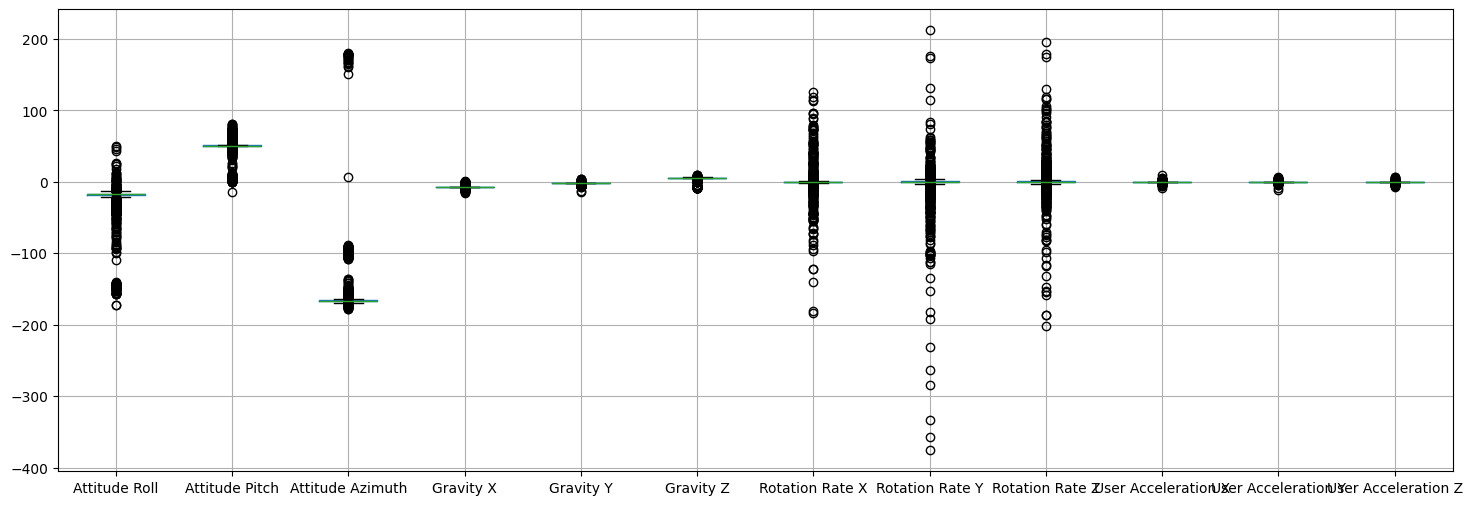

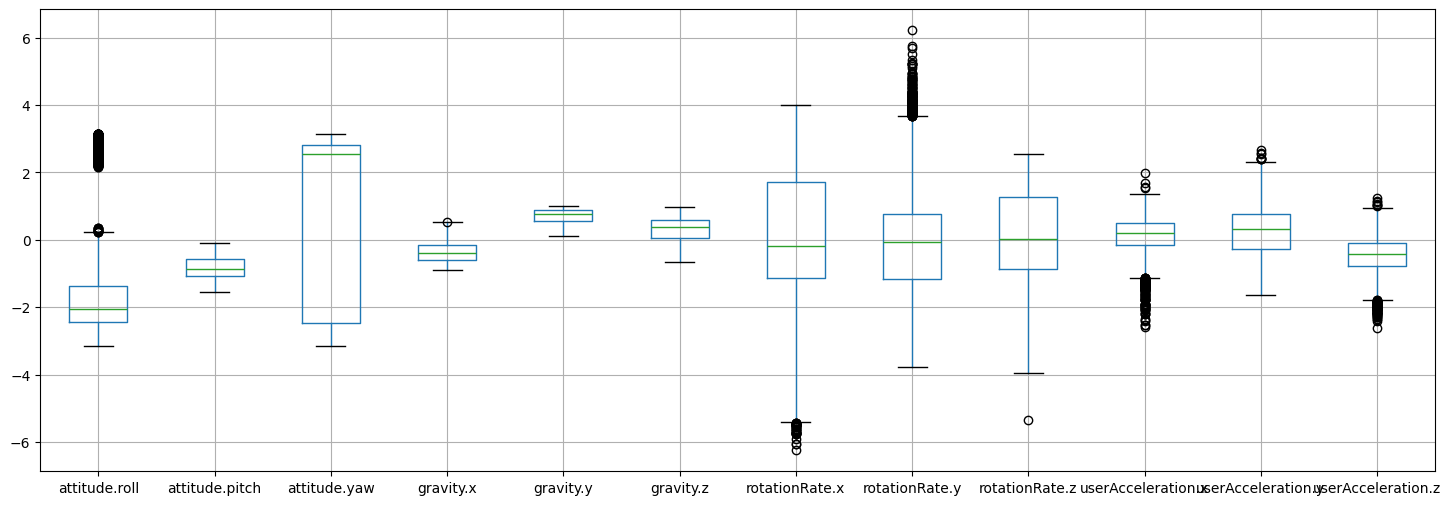

In [5]:
# boxplot
plt.figure(figsize=(18, 6)) 
df.boxplot()
plt.show()

# boxplot
plt.figure(figsize=(18, 6))
df_o.boxplot()
plt.show()

In [77]:
# opening scaling factor file to read the dictionary
with open('../constants.txt', 'r') as f:
    lines = f.readlines()
    scaling_factors = eval(lines[0])

scaling_factors

{'Attitude Roll': 0.1142376591444776,
 'Attitude Pitch': 6.743238035682087,
 'Attitude Azimuth': -0.41661325633781365,
 'Gravity X': -0.40567461707781854,
 'Gravity Y': -0.09295193616982254,
 'Gravity Z': -0.10113856668202935,
 'Rotation Rate X': -1.4943574681964766,
 'Rotation Rate Y': -1.2789613806297648,
 'Rotation Rate Z': -1.6287858288885937,
 'User Acceleration X': -0.0263404192567685,
 'User Acceleration Y': 0.11506888215007838,
 'User Acceleration Z': 0.14220148004175853}

In [78]:
# Multiply data with constants
for i in range(len(df.columns)):
    df.iloc[:, i] = df.iloc[:, i] * scaling_factors[df.columns[i]]

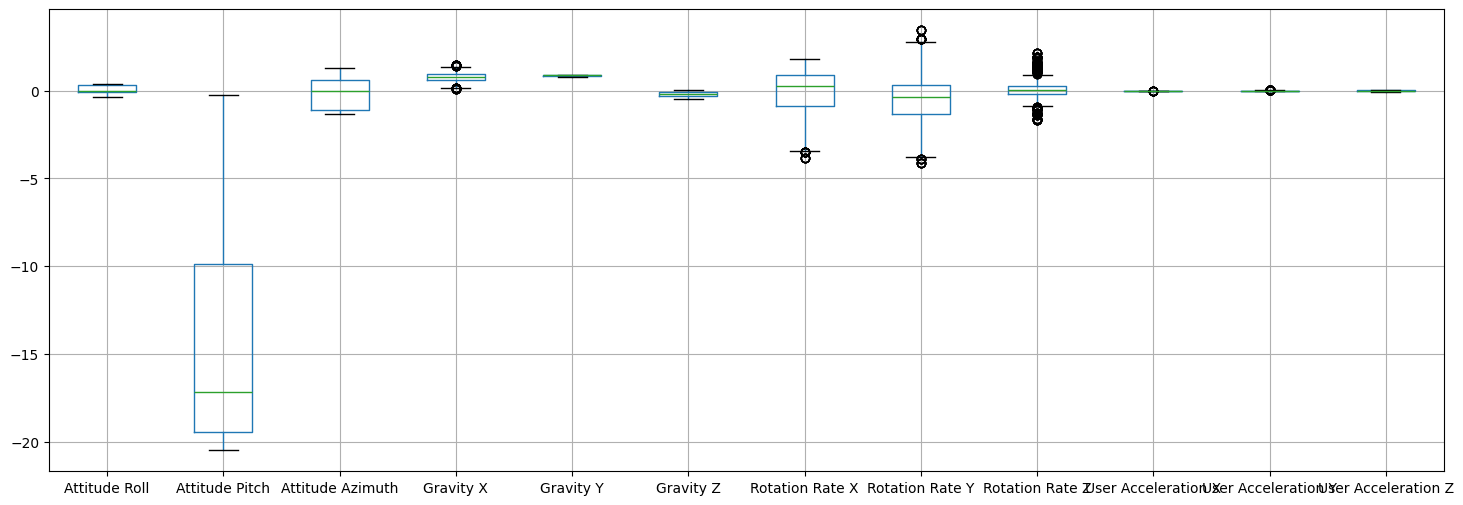

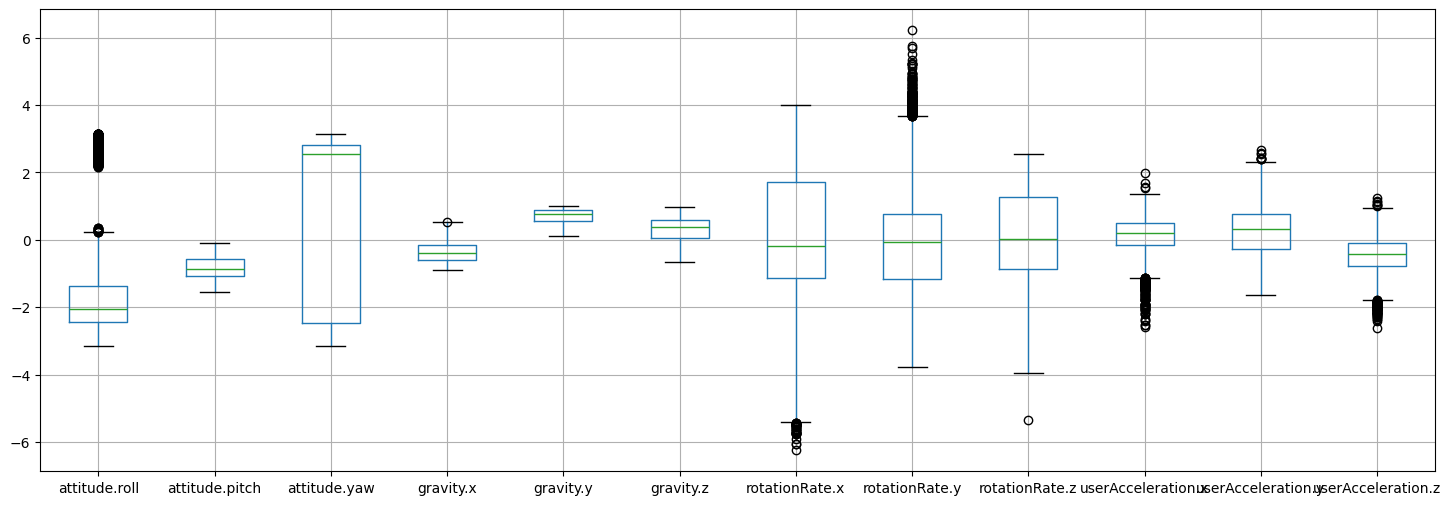

In [79]:
# boxplot
plt.figure(figsize=(18, 6)) 
df.boxplot()
plt.show()

# boxplot
plt.figure(figsize=(18, 6))
df_o.boxplot()
plt.show()

In [80]:
df.head(    )

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,-0.039312,-19.823916,0.755717,0.804684,0.846682,-0.307856,0.129138,0.440904,-0.462604,0.001165,-0.008597,-0.002385
1,-0.039312,-19.823916,0.755717,0.804684,0.846682,-0.307856,1.119461,0.193460,-0.248327,0.001165,-0.008597,-0.002385
2,-0.039312,-19.823916,0.755717,0.804684,0.846682,-0.307856,1.119461,0.193460,-0.248327,0.001165,-0.008597,-0.002385
3,-0.039312,-19.823916,0.755717,0.804684,0.846682,-0.307856,1.119461,0.193460,-0.248327,0.001165,-0.008597,-0.002385
4,-0.036694,-19.694066,0.865883,0.848861,0.842962,-0.312533,1.119461,0.193460,-0.248327,0.000775,-0.013224,-0.038135


In [81]:
df_o.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,-1.711140,-1.429168,-2.591433,-0.139767,0.989987,0.019745,-0.350593,-0.511691,-0.865217,0.091702,0.415881,0.093689
1,-1.787917,-1.414171,-2.630956,-0.152324,0.987759,0.033602,-0.550553,-2.243217,-0.582409,0.367412,0.004566,-0.106082
2,-1.897323,-1.399331,-2.706668,-0.161610,0.985336,0.054729,-0.931014,-1.358033,-0.503947,0.172093,-0.217483,-0.163387
3,-2.018375,-1.383279,-2.813421,-0.168058,0.982470,0.080680,-1.304668,-0.541368,-0.346302,0.004957,-0.237566,-0.019080
4,-2.124395,-1.364054,-2.913092,-0.174613,0.978705,0.107922,-1.278349,-0.434722,-0.398598,-0.040292,-0.241461,0.015201


# Preprocessing Data

In [82]:
# Prepare the data
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [83]:
from scipy.stats import mode

def sequence_generator(x, length, stride):
    seq_x = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        seq_x.append(input_sequence)
    return np.array(seq_x)

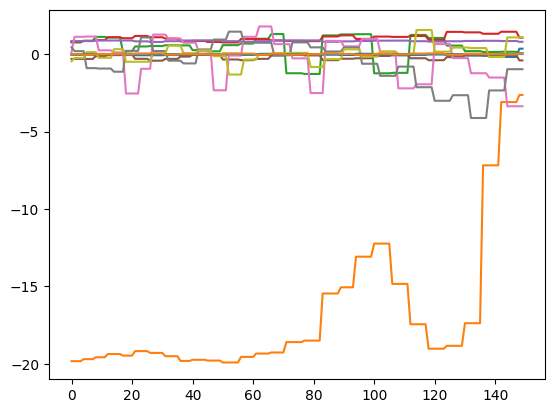

In [84]:
# Checking data
import matplotlib.pyplot as plt

tx = sequence_generator(df, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(tx[0])
plt.show()

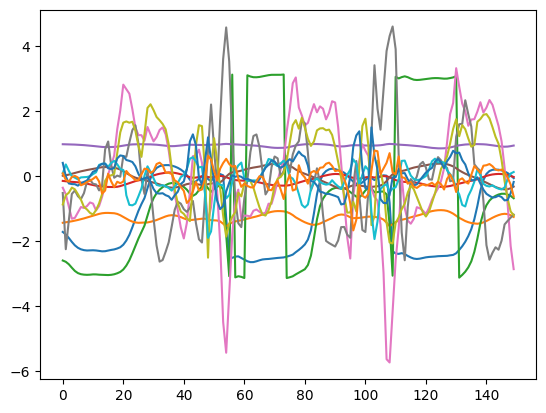

In [85]:
txc = sequence_generator(df_o, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(txc[0])
plt.show()

# Prediction

In [86]:
# Predict the data
y_pred = model.predict(tx)

# Get the most frequent label
y_pred = np.argmax(y_pred, axis=1)
y_pred = mode(y_pred)[0]
labels[y_pred]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'dws'